# Bryan Beus: Project 2 - Observations on the TMBD Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDB database provides data for analyzing movies. This dataset allows for the observation of film budgets, proceeds, cast and crew members, and more. 

The dataset itself is edited by Udacity. The original dataset came first from Kaggle, which in turn obtained the dataset from the TMDB API. 

Kaggle informs the user that there are some notable inaccuracies in the dataset. For example, when reporting proceeds for the film Avatar, the dataset undervalues the proceeds by 2 billion USD. While such inaccuracies may exist, for the purposes of this project, there is sufficient accuracy and information to perform calculations and draw general conclusions.

### Questions for Analysis

#### Q1: Cast Member Analysis

 * Which Cast Members Have the Highest Total Film Gross?

 * Which Cast Members Have the Lowest Total Film Gross?

 * Which Cast Members Have the Greatest Total Film Profit?

#### Q2: What Cost per Film is Associated with the Highest Profit?

#### Q3: How Much Does a Film Cost Per Minute on Average?

#### Q4: Describe the Characteristics Associated with the Adventure Genre?

### General Package Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df_original = pd.read_csv('tmdb-movies.csv')

#### Perform Initial Observations on the Fresh Dataframe

The following cells perform routine observations on the dataset, as outlined in the class lectures.

In [3]:
df_original.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df_original.shape

(10866, 21)

In [5]:
df_original.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df_original.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
df_original.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Observations on Datset Properties and Initial Dataframe Cleaning

The `id`, `imdb_id`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `production_companies`, `release_date`, `vote_count`, and `vote_average` columns have data that is irrelevant to the analysis questions. Furthermore, the `budget` and `revenue` columns can be replaced by their inflation-adjusted equivalents, `budget_adj` and `revenue_adj`.

In [9]:
df_original.drop(columns=(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'vote_average']), axis=1, inplace=True)

In [10]:
df_original.head(2)

,popularity,original_title,cast,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08


#### Drop Any Rows Where Budget or Revenue are Zero
All analysis questions take financial data into consideration, and explorations and observations on the data set show that some movies have missing budget and/or revenue value. These rows are unsuitable for this project and are removed in the following cells.

In [11]:
df_original.query('budget_adj < 1').iloc[-250:-150,:]

,popularity,original_title,cast,runtime,genres,release_year,budget_adj,revenue_adj
10461,0.188442,This Sporting Life,Richard Harris|Rachel Roberts|Alan Badel|Willi...,134,Drama,1963,0.0,0.000000e+00
10462,0.183514,McLintock!,John Wayne|Maureen O'Hara|Patrick Wayne|Stefan...,127,Comedy|Romance|Western,1963,0.0,0.000000e+00
10464,0.601084,X: The Man with the X-Ray Eyes,Ray Milland|Diana Van der Vlis|Harold J. Stone...,79,Horror|Science Fiction|Thriller,1963,0.0,0.000000e+00
10465,0.144419,Billy Liar,Tom Courtenay|Wilfred Pickles|Mona Washbourne|...,93,Romance|Comedy|Drama,1963,0.0,0.000000e+00
10466,0.142055,The Haunted Palace,Vincent Price|Debra Paget|Lon Chaney Jr.|Frank...,87,Horror,1963,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...
10633,0.385313,The Way We Were,Barbra Streisand|Robert Redford|Bradford Dillm...,118,Drama|Romance,1973,0.0,2.210022e+08
10634,0.021941,VÃ©ritÃ©s et Mensonges,Orson Welles|Joseph Cotten|Oja Kodar|Elmyr de ...,89,Documentary,1973,0.0,0.000000e+00
10635,0.175339,The Offence,Sean Connery|Trevor Howard|Vivien Merchant|Ian...,112,Drama|Crime,1973,0.0,0.000000e+00
10636,0.162168,The Satanic Rites of Dracula,Christopher Lee|Peter Cushing|Michael Coles|Wi...,87,Horror,1973,0.0,0.000000e+00


In [12]:
df_original.shape

(10866, 8)

Before removing the cells, `10866` total rows are found in the dataframe.

In [13]:
df_original = df_original[~np.isclose(df_original['budget_adj'], 0)]

In [14]:
df_original.shape

(5170, 8)

After removing all values that are approximately `0`, around half of all rows were removed, leaving `5170` rows.

In [15]:
df_original = df_original[~np.isclose(df_original['revenue_adj'], 0)]

In [16]:
df_original.shape

(3855, 8)

After another round of removing rows, this time removing values of `0` for `revenue_adj`, `3855` rows remain for the dataset.

### Parsing Cells that Contain Multiple Data Values 

There are several columns containing cells that have strings that contain multiple data entries per cell. In these cells, the data is separated by `|` bars.

The data within these cells is needed to answer the research questions. Separating out the data via a `split()` function may assist in performing calculations, but this must be done anew from the `df_original` dataframe for each analysis question to avoid confusion.

### Create a Dataframe to Handle Q1: Cast Member Analysis
 * Which Cast Members Are Associated the Highest Grossing Films?
 * Cast Members Associated with the Lowest Grossing Films?
 * Cast Members Associated with the Greatest Profit per Film?
 
 Answering these questions relies only on the `original_title`, the `cast` list, the `budget_adj`, and the `revenue_adj` columns.

In [17]:
df_cast_pre = df_original[['original_title', 'cast', 'budget_adj', 'revenue_adj']].copy()

#### Cleaning the Q1 Dataframe
Now is the appropriate time to drop null and duplicated data for all rows that are pertinent to the cast-related analysis questions.

In [18]:
df_cast_pre.isnull().sum()

original_title    0
cast              4
budget_adj        0
revenue_adj       0
dtype: int64

In [19]:
df_cast_pre.dropna(inplace=True)

In [20]:
df_cast_pre.isnull().sum()

original_title    0
cast              0
budget_adj        0
revenue_adj       0
dtype: int64

In [21]:
df_cast_pre.duplicated().sum()

1

In [22]:
df_cast_pre.drop_duplicates(inplace=True)

In [23]:
df_cast_pre.duplicated().sum().any()

False

#### Separate Cast Members for Each Film

In [24]:
df_cast_pre.shape

(3850, 4)

In [25]:
%%time
# Create an empty copy of the dataframe to hold the rows with parsed cast member data
df_cast = df_cast_pre[0:0].copy()

# To avoid requiring jupyter to repeatedly query the df1 dataframe for length, store the value as a variable 
len_df_cast_pre = len(df_cast_pre)

# For each row in the df_cast_pre dataframe:
for i in range(len_df_cast_pre):
    
    # Capture the cast members as a separated list
    cast_members = df_cast_pre.iloc[i,1]
    cast_members = cast_members.split("|")
    
    # For each cast member:
    for j in range(len(cast_members)):
        
        # Add a row with the matching data for each cast member and film
        df_cast.loc[len(df_cast)] = [df_cast_pre.iloc[i,0], cast_members[j], df_cast_pre.iloc[i,2], df_cast_pre.iloc[i, 3]]

    # Print progress    
    if (i + 1) % 500 == 0 or i + 1 == len_df_cast_pre:
        print('progress: {:.0%}'.format((i + 1) / len_df_cast_pre))
    if i + 1 == len_df_cast_pre:
        print('Total Rows Calculated: {}'.format(i + 1))

progress: 13%
progress: 26%
progress: 39%
progress: 52%
progress: 65%
progress: 78%
progress: 91%
progress: 100%
Total Rows Calculated: 3850
CPU times: user 47.4 s, sys: 110 ms, total: 47.5 s
Wall time: 47.6 s


In [26]:
df_cast.shape

(19196, 4)

The `df_cast` dataframe is prepared for the analysis question regarding cast members and finances.

### Create a Dataframe for Q2 (Finances) and Q3 (Finances and Runtime)

The Q2 and Q3 database cannot have rows that bear repetitive data, unlike the Q1 dataframe above. 

A fresh dataframe derived from `df_original` is needed, and the usual data cleaning of null and duplicate values follows.

In [27]:
df_fin_run = df_original[['original_title', 'runtime', 'budget_adj', 'revenue_adj']].copy()

In [28]:
df_fin_run.isnull().any()

original_title    False
runtime           False
budget_adj        False
revenue_adj       False
dtype: bool

In [29]:
df_fin_run.duplicated().sum()

1

In [30]:
df_fin_run.drop_duplicates(inplace=True)

In [31]:
df_fin_run.shape

(3854, 4)

In [32]:
df_fin_run.reset_index(drop=True, inplace=True)

Reseting the index is useful for finding the film with the highest profit.

The `df_fin_run` dataframe is prepared for Q2 and Q3 analysis.

### Create a Dataframe to Handle Q4's Adventure Genre Characteristics

This dataframe takes into account essentially all available columns from the original dataframe, and uses the splitting code developed for the Q1 dataframe, but applies the code instead to the `genres` column. 

In [33]:
df_genres_pre = df_original.copy()

In [34]:
df_genres_pre.shape

(3855, 8)

In [35]:
df_genres_pre.isnull().sum()

popularity        0
original_title    0
cast              4
runtime           0
genres            0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

The `cast` and `director` columns are the only columns to have null values. The nature of the Q4 analysis question does not necessarily place primary importance on these two columns, and therefore no rows are dropped at this time.

In [36]:
df_genres_pre.duplicated().sum()

1

In [37]:
df_genres_pre.drop_duplicates(inplace=True)

In [38]:
df_genres_pre.duplicated().any()

False

In [39]:
df_genres_pre.shape

(3854, 8)

In [40]:
df_genres_pre.head(1)

,popularity,original_title,cast,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09


In [41]:
df_genres_pre.iloc[0,5]

2015

Check that the `release_year` column does not contain inappropriate values, such as `0`.

In [42]:
df_genres_pre['release_year'].value_counts(sort=False, ascending=True)

1960      5
1962      7
1964      7
1966      5
1968      9
1970     11
1972      8
1974     13
1976     15
1978     17
1980     23
1982     26
1984     42
1986     48
1988     57
1990     53
1992     53
1994     62
1996     86
1998     92
2000    106
2002    127
2004    147
2006    169
2008    167
2010    178
2012    158
2014    165
1961     10
1963      6
1965      5
1967     13
1969      4
1971     13
1973     12
1975      9
1977     19
1979     16
1981     30
1983     31
1985     41
1987     46
1989     51
1991     50
1993     72
1995     81
1997     90
1999    116
2001    121
2003    121
2005    163
2007    165
2009    174
2011    199
2013    180
2015    160
Name: release_year, dtype: int64

Perform the same task on the `runtime` column; make sure that any values must be of a realistic runtime length for a film.

In [43]:
df_genres_pre['runtime'].value_counts(sort=False)

26     1
42     1
62     1
66     1
72     2
      ..
197    2
199    1
201    1
213    1
219    1
Name: runtime, Length: 139, dtype: int64

The runtime values are all between `26` and `219`, and therefore are appropriate.

#### Split the `genres` Column Data by the | Delimiter

In [44]:
# Create an empty copy of the dataframe to hold the rows with parsed cast member data
df_genres = df_genres_pre[0:0].copy()

In [45]:
df_genres

,popularity,original_title,cast,runtime,genres,release_year,budget_adj,revenue_adj


In [46]:
%%time

# For efficiency, store the length value as a variable 
len_df_genres_pre = len(df_genres_pre)

# For each row in the df_genres_pre dataframe:
for i in range(len_df_genres_pre):
    
    # Capture the genres and split along the delimiter |
    genres = df_genres_pre.iloc[i,4]
    genres = genres.split("|")
    
    # In the df_genres dataframe, add a new row with a single genre and its matching data:
    for j in range(len(genres)):
        df_genres.loc[len(df_genres)] = [df_genres_pre.iloc[i,0], df_genres_pre.iloc[i,1], df_genres_pre.iloc[i,2], df_genres_pre.iloc[i, 3], genres[j], df_genres_pre.iloc[i, 5], df_genres_pre.iloc[i, 6], df_genres_pre.iloc[i, 7]]

    # Print progress
    if (i + 1) % 500 == 0 or i + 1 == len_df_genres_pre:
        print('Progress: {:.0%}'.format((i + 1) / len_df_genres_pre))
    if i + 1 == len_df_genres_pre:
        print('Total Rows Calculated: {}'.format(i + 1))

Progress: 13%
Progress: 26%
Progress: 39%
Progress: 52%
Progress: 65%
Progress: 78%
Progress: 91%
Progress: 100%
Total Rows Calculated: 3854
CPU times: user 46.3 s, sys: 19.9 ms, total: 46.3 s
Wall time: 46.4 s


In [47]:
df_genres.shape

(10303, 8)

In [48]:
df_genres.head(10)

,popularity,original_title,cast,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action,2015,1.379999e+08,1.392446e+09
1,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Adventure,2015,1.379999e+08,1.392446e+09
2,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Science Fiction,2015,1.379999e+08,1.392446e+09
3,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Thriller,2015,1.379999e+08,1.392446e+09
4,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action,2015,1.379999e+08,3.481613e+08
5,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Adventure,2015,1.379999e+08,3.481613e+08
6,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Science Fiction,2015,1.379999e+08,3.481613e+08
7,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Thriller,2015,1.379999e+08,3.481613e+08
8,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure,2015,1.012000e+08,2.716190e+08
9,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Science Fiction,2015,1.012000e+08,2.716190e+08


Since Q4 concerns only the adventure genre, all rows that do not feature the `adventure` genre may be dropped. The `genres` column itself may also be dropped afterwards.

In [49]:
df_genres = df_genres.query('genres == "Adventure"').drop(axis=1, columns='genres')

In [50]:
df_genres.head(10)

,popularity,original_title,cast,runtime,release_year,budget_adj,revenue_adj
1,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,2015,1.379999e+08,1.392446e+09
5,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,2015,1.379999e+08,3.481613e+08
8,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,2015,1.012000e+08,2.716190e+08
12,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,2015,1.839999e+08,1.902723e+09
20,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,2015,1.241999e+08,4.903142e+08
25,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,125,2015,1.425999e+08,4.053551e+08
27,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141,2015,9.935996e+07,5.477497e+08
31,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91,2015,6.807997e+07,1.064192e+09
37,6.200282,Spectre,Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...,148,2015,2.253999e+08,8.102203e+08
42,6.189369,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,124,2015,1.619199e+08,1.692686e+08


In [51]:
df_genres.shape

(749, 7)

The `df_genres` dataframe is now prepared for exploratory analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Q1: Cast Member Analysis

#### Which Cast Members Have the Highest Total Film Gross?

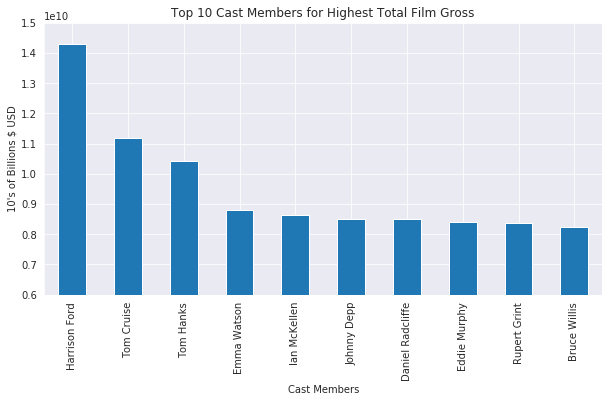

In [52]:
df_cast.groupby('cast').revenue_adj.sum().sort_values(ascending=False).iloc[:10].plot(kind='bar', figsize=(10, 5));
plt.xlabel('Cast Members')
plt.ylabel('10\'s of Billions $ USD')
plt.ylim(0.6e10,1.5e10)
plt.title('Top 10 Cast Members for Highest Total Film Gross')
plt.show()

The highest grossing film actor is Harrison Ford, followed by Tom Cruise and Tom Hanks. Other famous actors include the Harry Potter trio, Emma Watson, Daniel Radcliffe, and Rupert Grint. Bruce Willis rounds out the bottom of the list.

#### Which Cast Members Have the Lowest Total Film Gross?

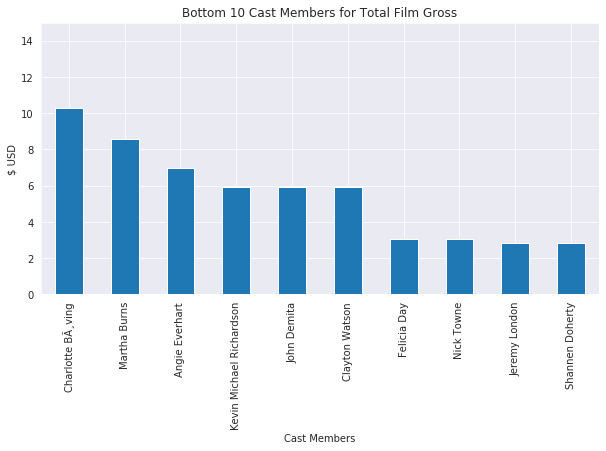

In [53]:
df_cast.groupby('cast').revenue_adj.sum().sort_values(ascending=False).iloc[-10:].plot(kind='bar', figsize=(10, 5));
plt.xlabel('Cast Members')
plt.ylabel('$ USD')
plt.ylim(0,15)
plt.title('Bottom 10 Cast Members for Total Film Gross')
plt.show()

Shannen Doherty, of Little House on the Prairie, takes the lowest grossing place on the list. The second lowest spot goes to Jeremy London, of the film Mallrats.

#### Which Cast Members Have the Greatest Film Profit?

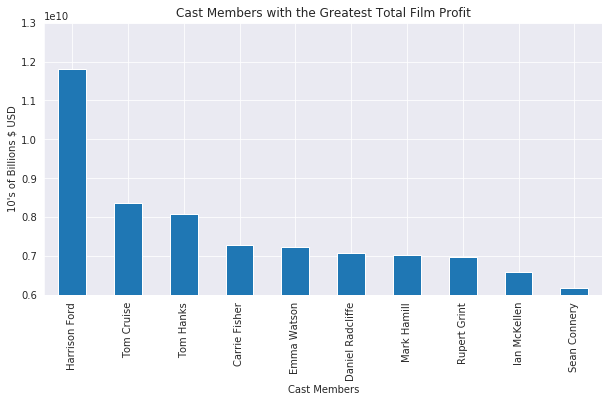

In [54]:
(df_cast.groupby('cast').revenue_adj.sum() - df_cast.groupby('cast').budget_adj.sum()).sort_values(ascending=False).iloc[:10].plot(kind='bar', figsize=(10, 5));
plt.xlabel('Cast Members')
plt.ylabel('10\'s of Billions $ USD')
plt.ylim(0.6e10,1.3e10)
plt.title('Cast Members with the Greatest Total Film Profit')
plt.show()

The profit list shows some changes in comparison with the earlier chart that considered gross revenue only.

The Star Wars trio, Harrison Ford, Carrie Fisher, and Mark Hamill are now all present. Bruce Willis drops off the list, replaced by Sean Connery. Johnny Depp also disappears from the list. 

#### Q2: What Cost per Film is Associated with the Highest Profit?

The first calculation to perform is to find the film with the highest profit.

In [55]:
(df_fin_run.revenue_adj - df_fin_run.budget_adj).sort_values(ascending=False).iloc[:5]

325     2.750137e+09
344     2.586237e+09
1767    2.234714e+09
3801    2.128036e+09
3543    1.878643e+09
dtype: float64

The film of index value `325` has the highest profit in this dataset.

In [56]:
df_fin_run.iloc[325,:]

original_title      Star Wars
runtime                   121
budget_adj        3.95756e+07
revenue_adj       2.78971e+09
Name: 325, dtype: object

Star Wars is the film with the highest profit.

The cost of this film is `$39,575,600 USD`.

#### Q3: How Much Does a Film Cost Per Minute on Average?

In [57]:
print('Average cost per minute of film: USD ${}'.format(int(round(df_fin_run['budget_adj'].sum() / df_fin_run['runtime'].sum()))))

Average cost per minute of film: USD $405053


#### Q4: Describe the Characteristics Associated with the Adventure Genre?

For simplicity in reporting, create a `profit` column by subtracting the `budget_adj` column from the `revenue_adj` column.

In [58]:
df_genres['profit'] = df_genres['revenue_adj'] - df_genres['budget_adj']

In [59]:
df_genres.describe()

,popularity,runtime,release_year,budget_adj,revenue_adj,profit
count,749.000000,749.000000,749.000000,7.490000e+02,7.490000e+02,7.490000e+02
mean,1.867693,112.615487,2000.178905,8.125573e+07,2.714075e+08,1.901517e+08
std,2.537015,21.336408,12.183097,6.095203e+07,3.383062e+08,3.125942e+08
min,0.015727,42.000000,1960.000000,3.169887e+01,3.038360e+00,-4.139124e+08
25%,0.626782,97.000000,1993.000000,3.437812e+07,4.702760e+07,2.446863e+06
50%,1.172353,109.000000,2004.000000,6.675594e+07,1.445834e+08,7.032041e+07
75%,2.179727,126.000000,2009.000000,1.185353e+08,3.815299e+08,2.596231e+08
max,32.985763,216.000000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


As provided in the response, Adventure films are generally not popular, with `75%` of the films receiving a low TMDB `popularity` score. The `max` popularity score, however, is highly popular. This film can be found using a `query()` command.

In [60]:
df_genres.query('popularity >= 32')

,popularity,original_title,cast,runtime,release_year,budget_adj,revenue_adj,profit
1,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,2015,1.379999e+08,1.392446e+09,1.254446e+09


`Jurassic World` is the most popular Adventure film in the database.

In terms of profitability, the majority of the Adventure films are profitable. From the `25%` percentile and upwards, profits are reported of at least `$2,446,863 USD`.

Another characteristic to consider is the frequency of Adventure films over time, as well as the proportion Adventure films acquire of all films produced each year.

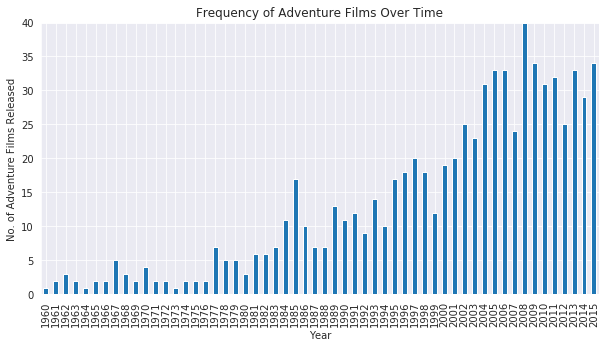

In [61]:
df_genres.release_year.value_counts().sort_index().plot(kind='bar', figsize=(10,5));
plt.xlabel('Year')
plt.ylabel('No. of Adventure Films Released')
plt.ylim(0, 40)
plt.title('Frequency of Adventure Films Over Time')
plt.show()

The frequency of Adventure films is clearly increasing over time. However, this may be due to an increased number of films produced each year overall. To gain a clearer insight, the following graph shows the proportion of Adventure films out of all films.

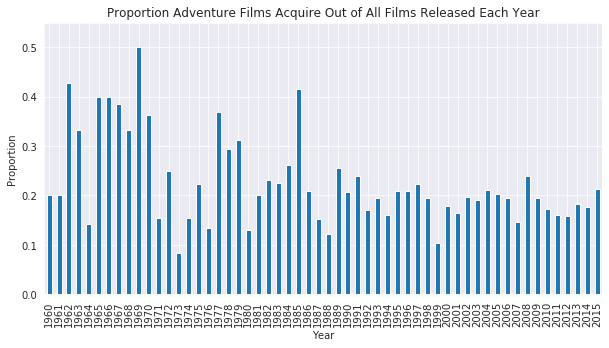

In [62]:
(df_genres.release_year.value_counts() / df_original.release_year.value_counts()).sort_index().plot(kind='bar', figsize=(10, 5));
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.ylim(0, 0.55)
plt.title('Proportion Adventure Films Acquire Out of All Films Released Each Year')
plt.show()

There seems to be a slight decrease in Adventure films, proportionally speaking.

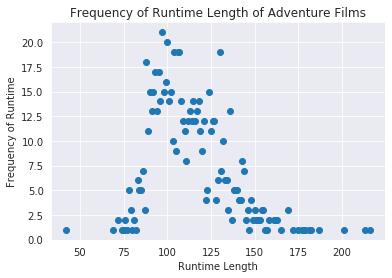

In [63]:
df_genres_runtime_value_counts = df_genres['runtime'].value_counts().sort_index().to_frame(name='runtime_frequency')
df_genres_runtime_value_counts['x'] = df_genres_runtime_value_counts.index
plt.scatter(x=df_genres_runtime_value_counts['x'], y=df_genres_runtime_value_counts['runtime_frequency']);
plt.title('Frequency of Runtime Length of Adventure Films')
plt.xlabel('Runtime Length')
plt.ylabel('Frequency of Runtime')
plt.show()

The Adventure film runtimes seem to cluster around two hours in length, with outliers as low as forty-five minutes and as high as four hours.

<a id='conclusions'></a>
## Conclusions

#### Project Limitations

The project faces several limitations. Many rows in the dataset have missing revenue and budget values, and in this project a choice was made to drop all such rows. This greatly limits the information available for conducting accurate assessments. For example, the film `An American Tail` is a popular animated adventure film with `df_original` index value of `10479`. This film and several thousand others like it were excluded from the dataset due to their missing values, and this skews the project results.

A different option to consider for future datasets with large numbers of missing values is to either input the median or mean value into missing data cells, or to use a package such as `missingpy` to rely on machine learning for inputting missing data. 

Another limitation is the age of the database, being already six years old at the time of this project. Recent films, such as the Marvel Avengers series, have set new records for film profitability. These films likely would create new results for many of the analysis questions.

#### Analysis Question Summaries

From Q1 analysis, the project discovered that `Harrison Ford` owns the top spot for both the highest gross film proceeds as well as for profit. `Shannen Doherty` owns the bottom spot for gross film revenue.

In Q2, `Star Wars` has the highest profit of the database, with a cost of `$39,575,600 USD`.

Q3 analysis showed that the average cost per minute of film is `$405053 USD`.

Finally, in Q4, the project discovered several key characteristics of Adventure films. They tend to be unpopular, with the `75%` percentile and below reporting popularity scores of below `2.2`. However, they are generally profitable, with the `25%` percentile and above reporting profits of at least `$2,000,000 USD`.

As shown in the above graphs, the frequency of Adventure films over time is generally increasing, but the proportion of adventure films out of all films released in any given year is slightly decreasing. 

Overall, the TMDB database proved useful for exploring capabilities of Jupyter Notebook and several of Anaconda's built-in features. 